# Simulating Vibrational Spectra

<p>
In this notebook, we’ll use CRYSTALClear to turn raw vibrational data from CRYSTAL simulations into clear, easy-to-read spectra — no tedious manual parsing required.
</p>

## Infrared Spectrum

CRYSTALClear comes with a handy plotting function called `plot_cry_spec` (in the `plot` module).  
It’s designed to take vibrational data you’ve already extracted from a CRYSTAL output and turn it into a polished spectrum — in just one line.

Here’s the basic idea:
1. **Load** your CRYSTAL output into a `Crystal_output` object.
2. **Extract IR data** by running the `.get_IR` method on that object.  
   This step create the `.IR_HO_0K` attribute containing harmonic frequencies and IR intensities (numpy 2D array).
3. **Plot** the IR spectrum by passing this attribute to `plot_cry_spec`.


Let's create a `Crystal_output` object (CO):

In [1]:
from CRYSTALClear.crystal_io import Crystal_output
CO = Crystal_output("thiourea_pbed3_Ahlrichs-pVTZ_freqcalc.out")

Then, we can extract IR data with this one-liner:

In [2]:
CO.get_IR()

We can finally create a plot by making use of the `plot_cry_spec` function:

(<Figure size 1600x600 with 1 Axes>,
 <AxesSubplot: xlabel='Wavenumber [cm$^{-1}$]', ylabel='Intensity [arb. u.]'>)

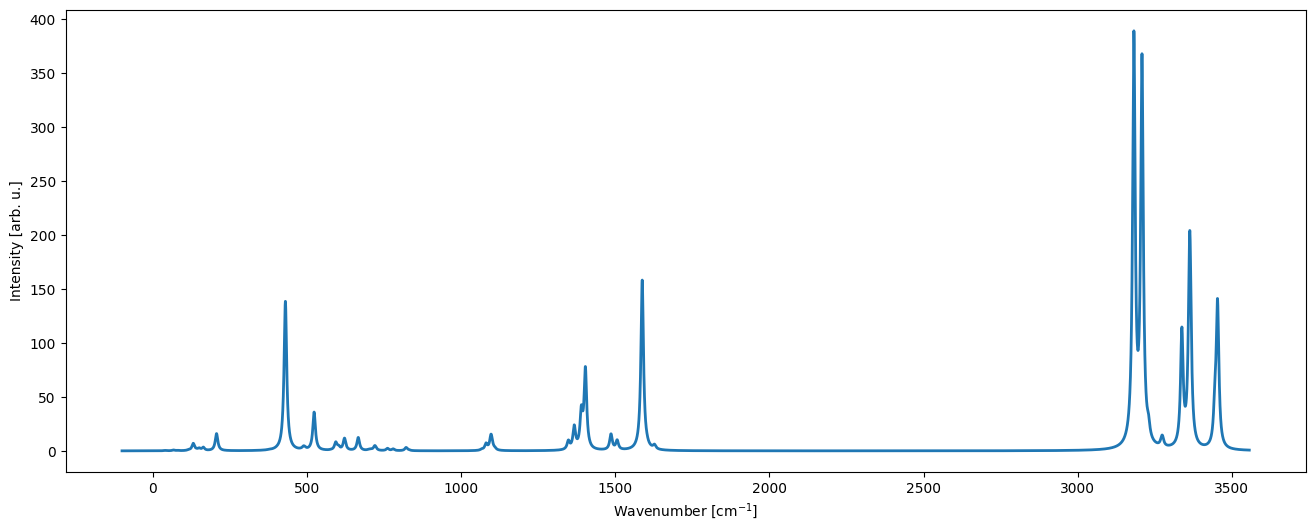

In [4]:
import CRYSTALClear.plot as CCplt 
CCplt.plot_cry_spec(CO.IR_HO_0K)

`plot_cry_spec` supports several optional arguments that allow you to control how the spectrum is displayed.  

A key argument is `typeS`, which defines the line shape:

- `"bars"` → Dirac delta lines (stick spectrum)  
- `"lorentz"` → Lorentzian peaks (default)
- `"gauss"` → Gaussian peaks  
- `"pvoigt"` → Pseudo-Voigt peaks (mixture of Lorentzian and Gaussian)  

When you choose a peak shape with `typeS`, a few additional parameters control exactly how the peaks are drawn:

- `bwidth` → *Half-width at half-maximum* (HWHM) for a **Lorentzian** profile.  
  - Larger `bwidth` → broader peaks with slower decay in the tails.  
  - Smaller `bwidth` → sharper, narrower peaks.  

- `stdev` → *Standard deviation* for a **Gaussian** profile.  
  - Larger `stdev` → wider, more “blurred” peaks.  
  - Smaller `stdev` → peaks become sharper and more defined.  

- `eta` → *Fraction of Lorentzian character* in a **pseudo-Voigt** profile.  
  - `eta = 0` → pure Gaussian  
  - `eta = 1` → pure Lorentzian  
  - Values in between blend the two shapes for a balanced peak form.  

Other optional arguments include style, labels, line width, frequency range, etc. For a full list of arguments, you can have a look at the [documentation](https://crystaldevs.github.io/CRYSTALClear/plot.html#CRYSTALClear.plot.plot_cry_spec).
Since the function returns `fig` and `ax`, you can still use all Matplotlib features to further customize the plot.

##  Raman Spectrum

The process is analogous to IR. After computing Raman intensities, pass the result to `plot_cry_spec`.

(<Figure size 600x600 with 1 Axes>,
 <AxesSubplot: xlabel='Wavenumber [cm$^{-1}$]', ylabel='Intensity [arb. u.]'>)

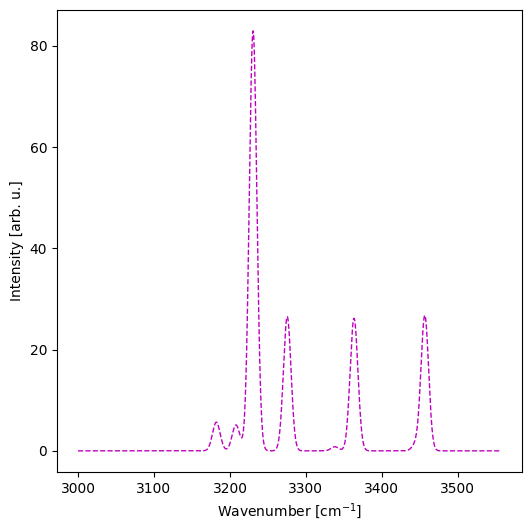

In [5]:
CO.get_Raman()
CCplt.plot_cry_spec(CO.Ram_HO_0K_tot, typeS="gauss", stdev=5, fmin=3000, style="m--", figsize=[6,6], linewidth=1)

##  Combined Spectra

Sometimes you want to see how the spectrum changes under different conditions — for example, the Raman spectrum of a compound at various temperatures or using different laser wavelengths.  

The `plot_cry_spec_multi` function is perfect for this. It accepts a list of spectra and plots them on the same axes. Optional arguments like `style` and `label` now **require lists of the same length** as the number of spectra. Each list entry corresponds to a spectrum in the same order.


In [4]:
# Raman spectra of the same material (alpha quartz) at three temperatures
qua10K = Crystal_output('qua_hf_2d_f-raman_10K_550nm.out')
qua295K = Crystal_output('qua_hf_2d_f-raman_295K_488nm.out')
qua400K = Crystal_output('qua_hf_2d_f-raman_400K_550nm.out')

qua10K.get_Raman()
qua295K.get_Raman()
qua400K.get_Raman()

Let's plot these spectra all together!

(<Figure size 1600x600 with 1 Axes>,
 <AxesSubplot: xlabel='Wavenumber [cm$^{-1}$]', ylabel='Intensity [arb. u.]'>)

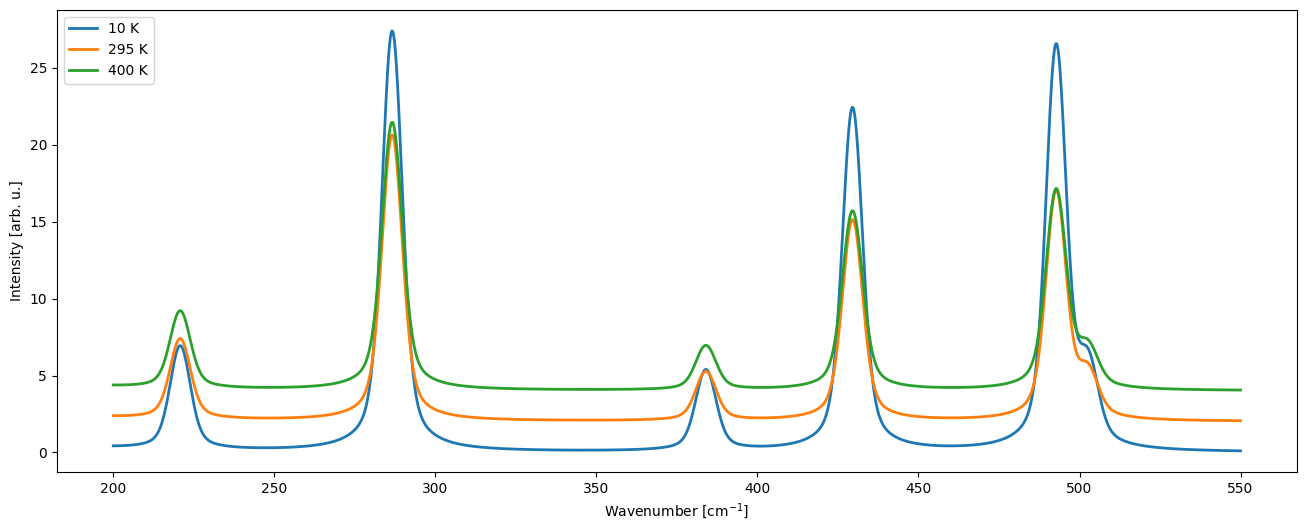

In [49]:
CCplt.plot_cry_spec_multi([qua10K.Ram_HO_0K_tot, qua295K.Ram_HO_0K_tot, qua400K.Ram_HO_0K_tot], typeS="pvoigt", label=['10 K', '295 K', '400 K'], fmin=200, fmax=550,  offset=2)